# TP sur les données blablacar

**Ce fichier est le fichier de travail**, l'autre fichier blablacar.ipynb est donné pour information et pour montrer comment les données ont été collectées. L'API blablacar permet de récupérer l'offre de transport sur la plateforme à partir de requêtes.


Vous aurez besoin des fichiers correspondant à des récupérations de données aux mois de septembre et novembre:
les fichiers ```blablacar_pp_sept.pkl``` et ```blablacar_pp_nov.pkl``` sont disponibles dans le répertoire ```ressources```.


Ces fichiers correspondent à des requêtes à partir des villes suivantes:
>  villes = ['Paris', 'Marseille', 'Grenoble', 'Lille', 'Strasbourg', 'Nantes', 'Bordeaux']
 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pickle as pkl

In [2]:
# mise à jour des librairies pour qu'on travaille tous dans le même environnement
# (en commentaire pour ne pas le faire chaque fois)
#! pip install numpy --upgrade
#! pip install matplotlib --upgrade
#! pip install pandas --upgrade

## Chargement des données

Les données numpy sont stockées au format pickle (code fourni ci-dessous):

1. Importer le module : import `pickle as pkl`
1. Charger les données avec `load`
1. La structure est un dictionnaire, les données sont dans le champ `data`
1. La description des colonnes est dans `indexcol`

Les lignes suivantes permettent de décomposer la structure de données pour accéder à toutes les informations utiles.

In [6]:
# chargement des données numpy : trajets, marques de voitures...

fich = pkl.load( open('ressources/blablacar_pp_sept.pkl', 'rb'))

# {'indexcol': cols , 'data':pp2db, 'villes': villes, 'marques':marques }
titles_col = fich['indexcol'] # titre des colonnes
# print(len(titles_col), titles_col) 
data = fich['data'] # matrice de données
# print(data.shape)
dico_villes = fich['villes'] # dictionnaire des villes
inv_dico_villes = dict(zip(dico_villes.values(), dico_villes.keys()))
dico_marques = fich['marques'] # dictionnaires des marques
inv_dico_marques = dict(zip(dico_marques.values(), dico_marques.keys()))
# print(dico_marques)
# print(inv_dico_marques)

## Passage au format pandas

Le code de transformation des données au format pandas est fourni. Ainsi, dans la suite de cet énoncé, vous aurez sous la main les deux formats `numpy` et `pandas`

- on remarque que les villes de départ et d'arrivée ne sont pas facile à exploiter
- on remarque que les marques de voitures sont des nombres (à transformer en chaine pour affichage si besoin)

In [13]:
df = pd.DataFrame(data)
df.columns = titles_col
print(df)

       annee  mois  jour  heure  dep_ville  arr_ville  dep_coord_x  \
0     2019.0   9.0  17.0   13.0     1634.0     1796.0    48.835669   
1     2019.0   9.0  17.0   13.0      585.0     1225.0    48.726243   
2     2019.0   9.0  17.0   14.0     1634.0     1262.0    48.847610   
3     2019.0   9.0  17.0   14.0     1634.0      845.0    48.818963   
4     2019.0   9.0  17.0   14.0     1634.0     1579.0    48.900444   
...      ...   ...   ...    ...        ...        ...          ...   
6423  2019.0   9.0  19.0   17.0      319.0     1666.0    44.859367   
6424  2019.0   9.0  19.0   17.0      953.0     2073.0    44.821500   
6425  2019.0   9.0  19.0   18.0      766.0       57.0    44.779981   
6426  2019.0   9.0  19.0   19.0      319.0     1576.0    44.837789   
6427  2019.0   9.0  19.0   20.0      843.0       78.0    44.830593   

      dep_coord_y  arr_coord_x  arr_coord_y  prix  marque  stars_confort  \
0        2.410543    49.563160     3.628554   9.0    37.0            2.0   
1      

In [14]:
# Illustration du passage des marques (difficiles à manipuler) à des numéros et inversement

nums = list(inv_dico_marques.keys())
nums.sort() # remise dans l'ordre

[inv_dico_marques[i] for i in nums]

['LADA',
 'OPEL',
 'DS',
 'VOLKSWAGEN',
 'GOLF',
 'MITSUBISHI',
 'FORD',
 'MINI',
 'IVECO',
 'JEEP',
 'LANCIA',
 'RANGE ROVER',
 'BMW',
 'TOYOTA',
 'SAAB',
 'RENAULT',
 'SEAT',
 'CITROEN',
 'SUBARU',
 'ROVER',
 'SUZUKI',
 'SUV LEXUS',
 'HYUNDAI',
 'PORSCHE',
 'SMART',
 'PEUGEOT',
 'CHEVROLET',
 'SKODA',
 'LAND ROVER',
 'DODGE',
 'DAEWOO',
 'MAZDA',
 'ISUZU',
 'LIDER',
 'SSANGYONG',
 'MERCEDES-BENZ',
 'INFINITI',
 'ALFA ROMEO',
 'MIETWAGEN',
 'JAGUAR',
 'NISSAN',
 'MERCEDES',
 'HUNDAI',
 'unknown',
 'LEXUS',
 'DACIA',
 'VOLVO',
 'TESLA',
 'MERCEDES BENZ',
 'AUDI',
 'FIAT',
 'CHRYSLER',
 'KIA',
 'HONDA']

## Q1: Mise en forme pandas
[question indépendante de la suite]

Les colonnes ville (arrivée & départ) et marque correspondent à des indices. Nous voulons ajouter 3 colonnes dans la structure de données `pandas` avec le nom des villes et le nom des marques. Ces données sont disponibles dans les dictionnaires (`inv_dico_marques` et `inv_dico_villes`) python chargés au début du fichier.

Les 3 colonnes seront nommées:
* dep_ville_nom
* arr_ville_nom
* marque_nom

***Aide:*** Attention à bien convertir les clés en entier, les réels ne sont pas tolérés.
Pour récupérer la marque de la voiture correspondant au premier trajet:
```python
print(inv_dico_marques[int(df['marque'][0])])
```

In [ ]:
# extraction de la marque correspondant à la ligne 0 du tableau:
print(inv_dico_marques[int(df['marque'][0])])

# 1. Extraire toutes les marques de toutes les lignes => dans une liste
# 2. Affecter cette liste à une nouvelle colonne dans pandas
#  TODO 


ALFA ROMEO


,annee,mois,jour,heure,dep_ville,arr_ville,dep_coord_x,dep_coord_y,arr_coord_x,arr_coord_y,prix,marque,stars_confort,distance,MARQUE_STR
0,2019.0,9.0,17.0,13.0,1634.0,1796.0,48.835669,2.410543,49.563160,3.628554,9.0,37.0,2.0,136.0,ALFA ROMEO
1,2019.0,9.0,17.0,13.0,585.0,1225.0,48.726243,2.365247,49.542538,0.193360,10.0,43.0,-1.0,208.0,unknown
2,2019.0,9.0,17.0,14.0,1634.0,1262.0,48.847610,2.395567,49.263805,2.469155,3.0,35.0,2.0,61.0,MERCEDES-BENZ
3,2019.0,9.0,17.0,14.0,1634.0,845.0,48.818963,2.359517,50.297283,2.782298,7.0,16.0,2.0,183.0,SEAT
4,2019.0,9.0,17.0,14.0,1634.0,1579.0,48.900444,2.386363,49.258589,4.024976,8.0,15.0,2.0,147.0,RENAULT


In [ ]:
# extraction des villes

print(inv_dico_villes[int(df['dep_ville'][0])])
print(inv_dico_villes[int(df['arr_ville'][0])])

# 1. Extraire toutes les villes de toutes les lignes => dans une liste
# 2. Affecter cette liste à une nouvelle colonne dans pandas
#  TODO 


Paris
Laon


,annee,mois,jour,heure,dep_ville,arr_ville,dep_coord_x,dep_coord_y,arr_coord_x,arr_coord_y,prix,marque,stars_confort,distance,MARQUE_STR,VILLE_DEP,VILLE_ARR
0,2019.0,9.0,17.0,13.0,1634.0,1796.0,48.835669,2.410543,49.563160,3.628554,9.0,37.0,2.0,136.0,ALFA ROMEO,Paris,Laon
1,2019.0,9.0,17.0,13.0,585.0,1225.0,48.726243,2.365247,49.542538,0.193360,10.0,43.0,-1.0,208.0,unknown,Paray-Vieille-Poste,Montivilliers
2,2019.0,9.0,17.0,14.0,1634.0,1262.0,48.847610,2.395567,49.263805,2.469155,3.0,35.0,2.0,61.0,MERCEDES-BENZ,Paris,Creil
3,2019.0,9.0,17.0,14.0,1634.0,845.0,48.818963,2.359517,50.297283,2.782298,7.0,16.0,2.0,183.0,SEAT,Paris,Arras
4,2019.0,9.0,17.0,14.0,1634.0,1579.0,48.900444,2.386363,49.258589,4.024976,8.0,15.0,2.0,147.0,RENAULT,Paris,Reims


## Q2 : Discrétisation et histogramme

Nous nous intéressons à la variable `distance` (dernière colonne de la structure `numpy`). Nous allons procéder de la manière suivante:
1. Analyse rapide de la variable aléatoire: calcul de la moyenne et de l'écart-type
1. Analyse plus fine (1): affichage des 10 déciles de la variable
1. Analyse plus fine (2): discrétisation de la variable en 10 intervalles de largeur constante & comptage des effectifs dans chaque catégorie (= construction d'un histogramme)
1. Discuter le nombre d'intervalles pour l'histogramme et trouver une valeur satisfaisante = faire des hist() graphiques et regarder la résolution qui semble intéressante

0.1     64.0
0.2     88.0
0.3    111.0
0.4    142.0
0.5    182.0
0.6    230.0
0.7    316.0
0.8    408.6
0.9    552.0
Name: distance, dtype: float64
[   6.          255.77777778  505.55555556  755.33333333 1005.11111111
 1254.88888889 1504.66666667 1754.44444444 2004.22222222 2254.        ]


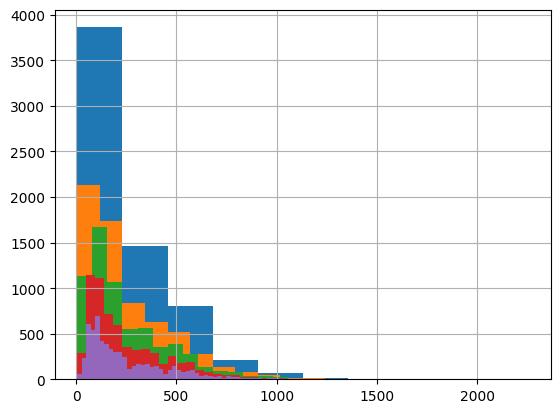

In [31]:
# Analyse rapide : moyenne, écart-type, calcul des quantiles pour faire la synthèse de cette variable aléatoire
df.describe() # version par défaut avec des grandeurs intéressantes

# 2. Deciles
#  TODO 

# 3. 10 intervalles constants
#  TODO 

# 4. intervalles
#  TODO 



## Q3 : enrichissement et histogramme 

Ajouter une variable `prix_km` dans votre structure de données (`numpy` ou `pandas`)

Tracer l'histogramme des prix au km

In [36]:
# réponse
# construction des prix au km
#  TODO 


0       0.066176
1       0.048077
2       0.049180
3       0.038251
4       0.054422
          ...   
6423    0.060000
6424    0.041885
6425    0.052632
6426    0.043902
6427    0.062176
Name: prix_km, Length: 6428, dtype: float64

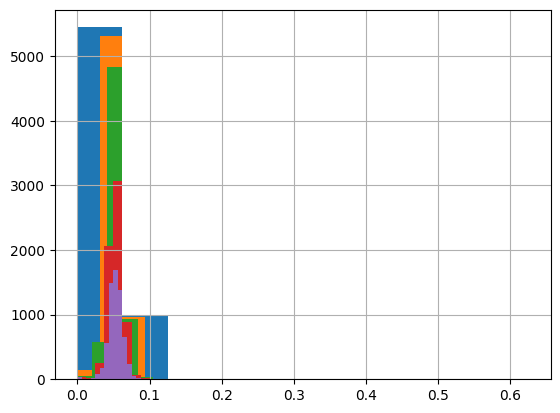

In [37]:

# histogramme des prix au km
#  TODO 

### Elimination des valeurs abbérantes

Il semble que quelques points abbérants faussent notre histogramme dans les prix au km. Nous proposons (arbitrairement) de seuiller toutes les valeurs au dessus du 99ème percentiles à la valeur du 99ème percentile. Vous pouvez tracer à nouveau l'histogramme pour voir la différence.
**Note:** il s'agit d'une normalisation très classique en analyse de données. On peut seuiller ou éliminer les données qui semblent abérrantes.


In [40]:
# elimination des valeurs aberrantes (calculer un seuil + seuiller = 2 lignes)
#  TODO 


/var/folders/_h/xz4nr0h53dj3x3tygxjnzl540000gn/T/ipykernel_36284/2872444305.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['prix_km'][df['prix_km']>seuil] = seuil


<Axes: >

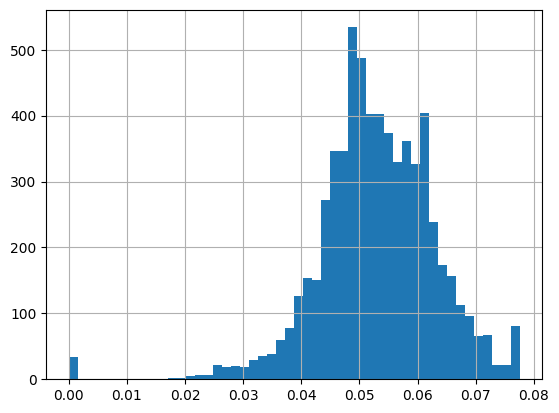

In [41]:

# tracé du nouvel histogramme
#  TODO 

## Q4: Distributions jointes

Nous voulons maintenant étudier la distribution jointe entre les prix au km et la marque de la voiture. Partir des distributions discétisées et construire le tableau d'effectif puis normaliser par les effectifs de l'échantillon pour estimer la loi jointe.


1. Discrétiser les prix au km en 30 catégories (et stocker l'indice dans une nouvelle colonne).
    - regarder la doc de `pd.cut`
1. Compter les effectifs pour chaque marque et chaque catégorie de prix. Normaliser ensuite par l'effectif pour obtenir un tableau homogène à une loi jointe (ie sommant à 1).<BR>
**Note:** il peut être plus facile de travailler sur la colonne marque (indice) plutôt que sur les chaines de caractères.    
**Note 2/rappel:** les indices dans une matrice doivent toujours être entiers. `int(...)` 
Si vos données sont réelles, il faut donc faire: `mat[int(data[...])]` pour accéder à la case de la matrice
    - possible à main (bon exercice pour les boucles)
    - faisable en une ligne avec `pd.crosstab`
1. Afficher ensuite la distribution jointe
**Rappel:** 
pour ajouter une description sur l'axe des x:
```python
fig, ax = plt.subplots(1,1)
plt.imshow(p_PM, interpolation='nearest')
ax.set_xticks(np.arange(len(dico_marques)))
ax.set_xticklabels(dico_marques.keys(),rotation=90,fontsize=8)
plt.show()
```
- Si l'image est trop petite pour voir quelque chose: solution = sauvegarde en pdf (ie vectorielle) + ouverture avec un logiciel de lecture pdf
```python
plt.savefig('mafigure.pdf')
```


In [ ]:
# réponse
Np = 30
# calcul d'une discrétisation
#  TODO 

# ajout de la catégorie de prix


[Text(0, 0, 'LADA'),
 Text(1, 0, 'OPEL'),
 Text(2, 0, 'DS'),
 Text(3, 0, 'VOLKSWAGEN'),
 Text(4, 0, 'GOLF'),
 Text(5, 0, 'MITSUBISHI'),
 Text(6, 0, 'FORD'),
 Text(7, 0, 'MINI'),
 Text(8, 0, 'IVECO'),
 Text(9, 0, 'JEEP'),
 Text(10, 0, 'LANCIA'),
 Text(11, 0, 'RANGE ROVER'),
 Text(12, 0, 'BMW'),
 Text(13, 0, 'TOYOTA'),
 Text(14, 0, 'SAAB'),
 Text(15, 0, 'RENAULT'),
 Text(16, 0, 'SEAT'),
 Text(17, 0, 'CITROEN'),
 Text(18, 0, 'SUBARU'),
 Text(19, 0, 'ROVER'),
 Text(20, 0, 'SUZUKI'),
 Text(21, 0, 'SUV LEXUS'),
 Text(22, 0, 'HYUNDAI'),
 Text(23, 0, 'PORSCHE'),
 Text(24, 0, 'SMART'),
 Text(25, 0, 'PEUGEOT'),
 Text(26, 0, 'CHEVROLET'),
 Text(27, 0, 'SKODA'),
 Text(28, 0, 'LAND ROVER'),
 Text(29, 0, 'DODGE'),
 Text(30, 0, 'DAEWOO'),
 Text(31, 0, 'MAZDA'),
 Text(32, 0, 'ISUZU'),
 Text(33, 0, 'LIDER'),
 Text(34, 0, 'SSANGYONG'),
 Text(35, 0, 'MERCEDES-BENZ'),
 Text(36, 0, 'INFINITI'),
 Text(37, 0, 'ALFA ROMEO'),
 Text(38, 0, 'MIETWAGEN'),
 Text(39, 0, 'JAGUAR'),
 Text(40, 0, 'NISSAN'),
 Text(41, 

<Figure size 640x480 with 0 Axes>

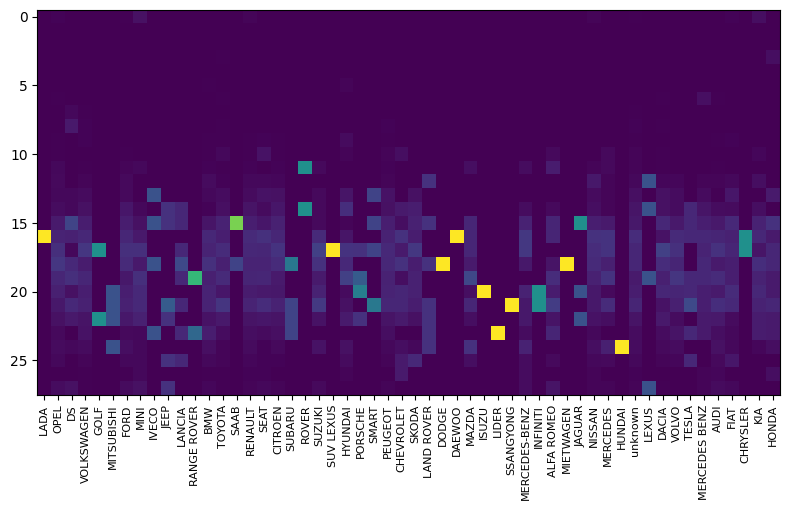

In [65]:
# réponse
# Np =30 déjà défini
Nm = len(dico_marques) # => ne pas mettre ces chiffres en dur ci-dessous => illisble

# calcul des probabilites jointes (Prix, Marque)

p_PM = np.zeros((Np,Nm))

#  TODO 

# pour l'affichage, une fois le calcul effectué


#plt.figure(figsize=(15,5))
fig, ax = plt.subplots(1,1)                  # pour avoir un pointeur vers les axes
fig.set_size_inches(15,5)
ax.imshow(p_PM)
ax.set_xticks(np.arange(p_PM.shape[1]))
ax.set_xticklabels([inv_dico_marques[i] for i in range(len(inv_dico_marques))],rotation=90,fontsize=8) 
# ax.colorbar()

## Q5 : Distributions conditionnelles

Il est diffile d'analyser la probabilité jointe... Nous allons donc passer à la loi conditionnelle: nous voulons donc calculer la probabilité du prix au km conditionnellement à la marque de la voiture.

1. Calculer `p_P_M`
1. Proposer un critère rapide pour vérifier que votre distribution conditionnelle respecte bien les propriétés de base
1. Dans le cas où les données de marques n'ont pas été nettoyées, cette distribution conditionnelle fait apparaitre des pics très marqués: à quoi correspondent ces pics? Pouvons-nous tirer parti de ces informations?

In [ ]:
# loi conditionnelle distance | marque

# calcul de la marginale sur les marques

# calcul de la loi conditionnelle

# critère rapide pour vérifier que la loi conditionnelle est bien formattée:

# affichage de la loi conditionnelle


### Réponse (à quoi correspondent ces pics)

votre réponse

## Q6: Tracé de l'ensemble de l'échantillon avec des codes couleurs

Nous proposons ensuite de tracer toutes les trajectoires des voitures blablacar. Pour cela, il faut utiliser la commande `plt.plot`.
Vous devez visualiser des trajectoires en étoiles à partir des 7 villes requêtes: `['Paris', 'Marseille', 'Grenoble', 'Lille', 'Strasbourg', 'Nantes', 'Bordeaux']`.

1. [NE PAS FAIRE] Dans un premier temps, il est possible de donner toutes les coordoonées de toutes les trajectoires... Attention à l'ordre des arguments dans le plot:
```plt.plot(tous_les_x, tous_les_y)```
Afin de tracer des trajectoires, il faut envoyer les x et les y 2 par 2 dans une boucle `for` <BR>
C'est très long et pas très joli...

1. Pour éviter les boucles, il existe une méthode `quiver` dédiée au tracé de champs de vecteurs: ça ira beaucoup plus vite qu'avec plot. Il faut juste bien comprendre les mécanismes d'échelles. Pour utiliser l'échelle 1, la commande est la suivante:
```python
plt.quiver(x_dep, y_dep, delta_x, delta_y,\
            angles='xy', scale_units='xy', scale=1)
```
Rappel: les noms les colonnes utiles sont: `dep_coord_x, dep_coord_y, arr_coord_x, arr_coord_y` <BR>
Cette approche est rapide à coder (une ligne) et rapide à exécuter (1 seconde)... Mais le résultat n'est pas très beau.

1. Isoler les trajets proposés à partir de chacune des villes sachant que leurs coordonnées sont:
```python
coord = np.array([[45.18721767,  5.72345183],
 [47.22572172, -1.56558993],
 [50.63010695,  3.07071992],
 [48.5782548,   7.74078742],
 [44.83848889, -0.58156509],
 [43.2991509,   5.38925024],
 [48.8477201,   2.34607889]])
```
Chaque trajectoire (point de départ) sera rattachée à la ville la plus proche.
Une fois la distance calculée pour chaque origine de trajectoire, vous pourrez avoir besoin de `argmin`
1. Tracer les trajets d'une couleur spéciale en fonction des origines. 



In [ ]:
# tracé de l'ensemble des trajectoires => moche et lent

plt.figure()
for t in data:
    plt.plot(t[[6,8]], t[[7,9]]) # dans les données au format numpy
    
plt.show()

# note le code couleur est arbitraire: matplot lib change de couleur à chaque passage dans la boucle


In [ ]:
# avec quiver


In [ ]:
# avec quiver et des couleur

# 1 recherche de la ville la plus proche du point de départ
coord = np.array([[45.18721767,  5.72345183],
 [47.22572172, -1.56558993],
 [50.63010695,  3.07071992],
 [48.5782548,   7.74078742],
 [44.83848889, -0.58156509],
 [43.2991509,   5.38925024],
 [48.8477201,   2.34607889]])

dep = np.vstack((df['dep_coord_x'], df['dep_coord_y'])).T
print(dep[0]) # coordonnée de la première ville

# calcul des distances => A vous de jouer
dist = 

print(dist[0]) # distance du premier point aux 7 villes de référence

# trouver la ville la plus proche (argmin)
ind_ville = 

print(np.unique(ind_ville)) # vérifier que toutes les villes sont au moins sélectionnées une fois

# affichage
couleurs = ['r', 'g', 'b', 'y', 'm', 'k', 'c']

plt.figure()
for ind in range(len(coord)): # pour chaque ville
    index  = ... # recherche des indices dans le tableau correspondant à la ville ind
    
    plt.quiver(df['dep_coord_x'].values[index], df['dep_coord_y'].values[index],\
           (df['arr_coord_x']-df['dep_coord_x']).values[index], (df['arr_coord_y']-df['dep_coord_y']).values[index],\
         angles='xy', scale_units='xy', scale=1, color = couleurs[ind])

## Q7: Etude de la corrélation entre variables

On propose d'étudier la corrélation entre la distance du trajet et le nombre d'étoiles de confort. Attention, les étoiles ne sont pas toujours renseignées (-1 = inconnu). On fera aussi ces opérations entre la distance et le prix.

1. Tracer dans le plan les coordonnées (distance,etoile) pour les points concernés (ie en éliminant les points sans information sur les étoiles)

Vous utiliserez la commande `scatter` pour réaliser l'opération
1. Calculer le coefficient de corrélation entre les deux variables aléatoires

1. refaire les mêmes opérations pour le deuxième couple de variables aléatoires


In [ ]:
# test de corrélation entre la distance et le confort de la voiture

# coef



# test de corrélation entre la distance et le prix

# coef



## Q8 : partie optionnelle

Comparer les données de septembre et de novembre. Chercher les points communs et les différences.

### Question optionnelle (assez difficile) : mettre au propre les marques de voiture

On remarque que les données ne sont pas propres au niveau des marques: proposer une technique pour mettre au propre le tableau et enlever les doublons. 

Une méthode consiste à identifier les doublons à la main et les fusionner. Une autre approche consiste à calculer des distances d'édition entre les marques et à mettre des seuils :
```
import Levenshtein
mot1 = "chat"
mot2 = "chien"
distance = Levenshtein.distance(mot1, mot2)
print("Distance d'édition :", distance)
```

In [ ]:
# A ne faire que si vous avez envie de traiter cette question avec une distance d'étition
# # ! pip install levenshtein

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 15.2 MB/s eta 0:00:00


In [12]:
import Levenshtein

# détection des doublons potentiels:
for m in inv_dico_marques.values(): # afficher pour chaque marque quelles sont les marques les plus proche (détection des doublons)
    #print(m)
    #  TODO 

FORD ['FIAT', 'HONDA', 'GOLF', 'BMW', 'LADA']
BMW ['DS', 'KIA', 'FORD', 'JEEP', 'GOLF']
ISUZU ['SUZUKI', 'NISSAN', 'IVECO', 'SAAB', 'DS']
OPEL ['JEEP', 'ROVER', 'SAAB', 'FIAT', 'GOLF']
LAND ROVER ['RANGE ROVER', 'ROVER', 'LIDER', 'ALFA ROMEO', 'LANCIA']
LIDER ['ROVER', 'LADA', 'JEEP', 'DODGE', 'KIA']
DS ['KIA', 'BMW', 'AUDI', 'LADA', 'FIAT']
AUDI ['MINI', 'MAZDA', 'DS', 'HUNDAI', 'LADA']
DACIA ['LANCIA', 'LADA', 'MAZDA', 'KIA', 'SKODA']
JAGUAR ['LADA', 'SAAB', 'AUDI', 'DACIA', 'MAZDA']
TOYOTA ['SKODA', 'TESLA', 'HONDA', 'FORD', 'LANCIA']
SUZUKI ['ISUZU', 'HUNDAI', 'SUBARU', 'AUDI', 'SAAB']
HUNDAI ['HYUNDAI', 'HONDA', 'AUDI', 'MINI', 'LADA']
CITROEN ['NISSAN', 'MIETWAGEN', 'LIDER', 'CHEVROLET', 'ROVER']
IVECO ['JEEP', 'ROVER', 'ISUZU', 'OPEL', 'VOLVO']
RENAULT ['SEAT', 'SMART', 'TESLA', 'PEUGEOT', 'AUDI']
SKODA ['LADA', 'MAZDA', 'HONDA', 'KIA', 'DODGE']
ROVER ['OPEL', 'LIDER', 'FORD', 'GOLF', 'JEEP']
MITSUBISHI ['SUBARU', 'ISUZU', 'INFINITI', 'MINI', 'NISSAN']
MERCEDES-BENZ ['MERCEDES B